## Introduction to Hypothesis Testing



In [1]:
import pandas as pd

stack_overflow = pd.read_feather(r"C:\Users\Odinaka Ekemezie\Downloads\stack_overflow.feather")
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


Let's hypothesize that the mean annual compensation of the population of data scientists is $110,000

Let's examine the mean compensation (point estimate) from the sample data as follows:

In [2]:
mean_comp_samp = stack_overflow['converted_comp'].mean()
mean_comp_samp

119574.71738168952

While the point estimate is different from our hypothesis, the question is: is it meaningfully different? To answer this, we will generate a bootstrap distribution of sample means:

In [3]:
import numpy as np

so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
        np.mean(stack_overflow.sample(frac=1, replace=True)['converted_comp'])
    )

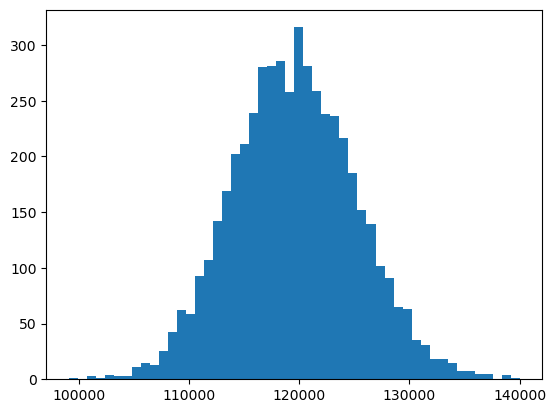

In [4]:
import matplotlib.pyplot as plt
plt.hist(so_boot_distn, bins=50)
plt.show()

Recall that the standard deviation of the sample statistics in the bootstrap distribution estimate the standard error of the statistics. This is calculated below:

In [5]:
std_error = np.std(so_boot_distn, ddof=1)
std_error

5581.0940650271505

### z-scores

Before we test our hypothesis,we need to standardize our values. A common way of standarding values is as follows:
$$
\text{standardized value} = \frac{\text{value} - \text{mean}}{\text{standard error}}
$$

For hypothesis testing, we use a variation where we take the sample statistic, subtract the hypothesized parameter value, and divide by the standard error. The result is called a __z-score__
$$
z = \frac{\text{sample stat} - \text{hypoth. param. value}}{\text{standard error}}
$$

In simple terms, a z-score tells you how many standard deviations away from the average (mean) a particular data point is.

Think of it as a standardized ruler for measuring how "special" or "unusual" a single data point is compared to the rest of its group. It answers the question: "Is this value pretty normal, or is it an outlier?"

Imagine you and a friend are walking in Port Harcourt. You say, "I live 200 steps from the market." Your friend says, "I live 150 steps from the market." Who lives further? You don't know, because your "step" might be much longer than your friend's.

But if you both use a standard unit like meters, the comparison is perfect. "I live 150 meters away," and "I live 120 meters away." Now it's clear.

A z-score is like that meter. It converts a raw score into a universal, standardized unit called a standard deviation. This lets you compare different scores from different datasets.

1. A z-score of 0 means the data point is exactly the average.

2. A positive z-score means the data point is above the average.

3. A negative z-score means the data point is below the average.

4. The magnitude tells you how far away it is. A z-score of -2.5 is just as "extreme" as a z-score of +2.5. Generally, z-scores greater than +2 or less than -2 are considered unusual.


In [6]:
mean_comp_hyp = 110000
# calculate z-score
z_score = (mean_comp_samp - mean_comp_hyp) / std_error
z_score

1.7155628036602433

Now the question is whether this score is high or low. Thus one use case of hypothesis testing is to determine whether a sample statistic is close to or far away from an expected (or hypothesized value)

In [7]:
late_shipments = pd.read_feather(r"C:\Users\Odinaka Ekemezie\Downloads\late_shipments.feather")

In [8]:
# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late'] == 'Yes').mean()

# Print the results
print(late_prop_samp)

0.061


In [9]:
# create a bootstrap distribution list of proportion of late shipments
late_shipments_boot_distn = []
for _ in range(5000):
   late_shipments_boot_distn.append(
       np.mean((late_shipments['late'] == 'Yes').sample(frac=1, replace=True))
   )

print(late_shipments_boot_distn[0:10])

[0.079, 0.058, 0.058, 0.073, 0.074, 0.056, 0.065, 0.044, 0.06, 0.062]


In [10]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error
# Print z_score
print(z_score)

0.1313511889629029


## Key Points

Hypothesis tests are like criminal trials. There are two possible states:
1. Defendant committed the crime
2. Defendant did not commit the crime

There are also two possible outcomes:
1. Guilty
2. Not Guilty

The initial assumption is that the defendant is not guilty, and the prosecution team must present evidence beyond the reasonable doubt for a guilty verdict.

__DEFINITIONS__
1. A hypothesis is a statement about an unknown population parameter.
2. Hypothesis test is a test of two competing hypotheses:
    - The __Null Hypothesis__ (H<sub>0</sub>), which is the existing idea
    - The __Alternative Hypothesis__ (H<sub>A</sub>), which is a new idea that challenges the existing one

For example, we could say:
1. (H<sub>0</sub>): The proportion of data scientists starting programming as children is 35%.
2. (H<sub>A</sub>): The proportion of data scientists starting programming as children is greater than 35%

__Important Notes__
1. Only one of the hypothesis can be true, either H<sub>0</sub> or H<sub>A</sub>
2. Intially, the null hypothesis is assumed to be true. This only changes if the sample provides enough evidence to reject it
3. We don't say 'accept the alternative hypothesis'. It's conentional to say 'reject H<sub>0</sub>' or 'fail to reject H<sub>0</sub>'
4. If the evidence from the sample is "significant" that H<sub>A</sub> is true, reject H<sub>0</sub>, else choose H<sub>0</sub>

N/B: Significance level is "beyond a reasonable doubt" for hypothesis testing.

__One-tailed and Two-tailed Tests__

Hypothesis tests determine whether the sample statistics lie in the tails of the null distribution, which is the distribution of the statistic if the null hypothesis was true. There are three types of tests and the phrasing of the alternative hypothesis determines which type we should use:
1. If the alternative hypothesis is phrased as "different" from the null hypothesis, use __two-tailed test__
2. If the alternative hypothesis uses languages like "less than" or "fewer", use __left-tailed test__
3. If the alternative hypothesis says "greater than" or "exceeds" the null, use __right-tailed test__

__p-values__

p-values measure the strength of support for the null hypothesis. They measure the probability of obtaining a result assuming the null hypothesis is true.
1. Large p-values mean that the statistic is likely not in the tail of the null distribution. This indicate that chance could at play, hence a support for Null hypothesis
2. Small p-values mean the statistic is likely in the tail of the null distribution, hence a strong evidence against the null hypothesis
3. p-values are probalilties, hence the value is between zero and one. small values mean 'close to zero'

__Calculating p-value__
1. Calculate the z-score
2. use norm.cdf from the scipy.stats module
3. For left-tailed test, use norm.cdf()
4. For right-tailed test, use 1 - norm.cdf()
5. Pass the z-score to norm.cdf, set mean to zero, and standard deviation to 1


In [11]:
# Get the sample statistic
prop_child_samp = (stack_overflow['age_first_code_cut'] == 'child').mean()
print(prop_child_samp)

0.39141972578505085


In [12]:
# state the hypothesized value
prop_child_hyp = 0.35

In [13]:
# create a bootstrap distribution
first_code_boot_distn = []
for _ in range(5000):
   first_code_boot_distn.append(
       np.mean((stack_overflow['age_first_code_cut'] == 'child').sample(frac=1, replace=True))
   )

print(first_code_boot_distn[0:10])

[0.3892083149049093, 0.39849624060150374, 0.38699690402476783, 0.39097744360902253, 0.38301636444051307, 0.3998230871295887, 0.3940734188412207, 0.40468819106590004, 0.38567005749668287, 0.4082264484741265]


In [14]:
# get the standard error from the bootstrap distribution
std_error = np.std(first_code_boot_distn, ddof=1)
std_error

0.010244570182939063

In [15]:
# calculate the z-score
z_score = (prop_child_samp - prop_child_hyp) / std_error
z_score

4.043090636836067

In [16]:
from scipy.stats import norm

# calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
p_value

2.6375608468964806e-05

## Statistical Significance

What defines a cut-off point between a small p-value and a large p-value? The cut-off point is known as __Significance level__, and is denoted by $\alpha$. The significance level of a hypothesis test is the threshold point for "beyond a reasonable doubt". The appropriate significance level depends on the dataset and the discipline worked in. Common values are 0.2, 0.1, 0.05, and 0.01. 0.05 is the most common choice. If the p-value is less than or equal to the $\alpha$, we reject the null hypothesis. Otherwise, we fail to reject it. $\alpha$ should be set prior to conducting the hypothesis test. 

__Calculating p-value__

The workflow of calculating the p-value goes like this:
1. Set the significance level
2. Calculate the sample mean
3. Assign the hypothesized mean
4. Obtain the standard error from the bootstrap distribution
5. Calculate the z-score
6. Calculate the p-value

__Making a Decision__

1. If p $\leq$ 0.05, reject H<sub>0</sub>, else choose H<sub>0</sub>

In [17]:
# set the significance level
alpha = 0.05

# Get the sample mean
prop_child_samp = (stack_overflow['age_first_code_cut'] == 'child').mean()

# state the hypothesized value
prop_child_hyp = 0.35

# get the standard error from the bootstrap distribution
std_error = np.std(first_code_boot_distn, ddof=1)

# calculate the z-score
z_score = (prop_child_samp - prop_child_hyp) / std_error

# calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
p_value

2.6375608468964806e-05

In [18]:
p_value <= alpha

True

Since p $\leq$ 0.05, we reject the null hypothesis

## Confidence Intervals

To get a sense of the potential values of the population parameter, we choose a significance level of 1 - $\alpha$. For example, if $/alpha$ = 0.05, we use a confidence interval of 95%. When you have a confidence interval width equal to one minus the significance level, if the hypothesized population parameter is within the confidence interval, you should fail to reject the null hypothesis.

In [19]:
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)
print((lower, upper))

(0.3710747456877488, 0.41132242370632466)


## Types of Errors

For hypothesis testing, there a ways to get it right and two types of errors.
1. If we reject the null hypothesis when the null hypothesis was correct, we commit a false positive error or __Type I__ error
2. If we fail to reject the null hypothesis, when the null hypothesis was wrong, we commit a false negative error or __Type II__ eror

## Performing t-tests

A t-test is a statistical test used to determine whether there is a significant difference between the means of two groups or between a sample mean and a known value. It is particularly useful when dealing with small sample sizes or when the population standard deviation is unknown.

__Types of t-tests__

There are three main types of t-tests. Each compares means under different conditions:

1. __One-Sample t-test__: This test compares the mean of a single sample to a known value or population mean. It determines if the sample mean significantly deviates from a specific benchmark. For example, we can use a one-sample t-test to evaluate whether the average test score of a small class differs from the national average.
2. __Independent Two-Sample t-test__: This test compares the means of two independent groups to determine if there is a statistically significant difference between them. It is commonly used in experiments where two groups undergo different treatments or conditions. For instance, we could use an independent two-sample t-test to compare test scores between students taught using two different teaching methods to see if one method is more effective.
3. __Paired t-test__: This test compares means from the same group at different times or under different conditions. It evaluates whether there is a significant change within the same group after an intervention or over time. An example is measuring student performance before and after implementing a new teaching strategy to assess its impact.

__How Does a t-test differ from a z-test?__

A Z-test is a statistical test used to determine whether there is a significant difference between the sample mean and the population mean or between the means of two groups when the population standard deviation is known, and the sample size is large. 

## Two-sample Tests 

Here, we compare sample statistics across groups in a variable. For instance, we could ask ourselves: are average sales in restaurant A greater than averages sales in restaurant B?

Lets look at the scenario below:

__H<sub>0</sub>__: The mean compensation (in USD) is the same for those that coded first as a child and those that coded first as an adult \
H<sub>0</sub>: $\mu$<sub>child</sub> = $\mu$<sub>adult</sub> \
H<sub>0</sub>: $\mu$<sub>child</sub> - $\mu$<sub>adult</sub> = 0

__H<sub>A</sub>__: The mean compensation (in USD) is the greater for those that coded first as a child and those that coded first as an adult \
H<sub>A</sub>: $\mu$<sub>child</sub> > $\mu$<sub>adult</sub> \
H<sub>A</sub>: $\mu$<sub>child</sub> - $\mu$<sub>adult</sub> > 0

The zero (in H<sub>0</sub>: $\mu$<sub>child</sub> - $\mu$<sub>adult</sub> = 0) corresponds to our hypothesized value for the difference in means

__T-statistics__

$$
t = \frac{\bar{x}_a - \bar{x}_b}{\sqrt{\frac{s_a^2}{n_a} + \frac{s_b^2}{n_b}}}
$$


In [20]:
# calcuate mean compensation for each group
xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
print(xbar)

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64


In [21]:
# calculate the standard deviation for each group
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
print(s)

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64


In [22]:
# calculate the number of observations for each group
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
print(n)

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64


In [23]:
# calculating t-statistics
numerator = xbar['child'] - xbar['adult']
denominator = np.sqrt(s['child'] ** 2 / n['child'] + s['adult'] ** 2 / n['adult'])
t_stat = numerator / denominator
print(t_stat)

1.8699313316221844


## Calculating p-values from t-statistics

The test statistic, t, follows a t-distribution. This distribution has a parameter called the __degree of freedom__. The t-distribution, for small degrees of freedom has a fatter tails than the normal distribution, otherwise they look similar. As we increase df, the t-distribution gets closer to the normal distribution. Degrees of freedom are defined as the maximum number of logically independent values in the data sample. Suppose our dataset has 5 independent observations, and four of the values are 2, 6, 8, and 5. Suppose we also know that the sample mean is 5, thus, with this knowledge, the fifth value is no longer independent"; the value must be 4. So even though we have 5 idependent observation, because we know an additional fact about the sample, i.e. the mean, we only have 4 degrees of freedom. 

In [24]:
n_child = n['child']
n_adult = n['adult']
# calculate the degree of freedom
degrees_of_freedom = n_child + n_adult -2 # since we know two sample statistics (means for the two groups)
degrees_of_freedom

2259

In [25]:
from scipy.stats import t
p_value = 1 - t.cdf(t_stat, df = degrees_of_freedom)
p_value

0.030811302165157595

## Paired t-tests

This test compares means from the same group at different times or under different conditions. It evaluates whether there is a significant change within the same group after an intervention or over time. An example is measuring student performance before and after implementing a new teaching strategy to assess its impact.

__Case Study__
_Question_: Was the percentage of the Repubican candidates votes lower in 2008 than 2012

H<sub>0</sub>: $\mu$<sub>2008</sub> - $\mu$<sub>2012</sub> = 0

H<sub>A</sub>: $\mu$<sub>2008</sub> - $\mu$<sub>2012</sub> < 0

set $/alpha$ = 0.05 significance level

Instead of considering the variables separately, we can consider a single variable of the difference. Restate the hypothesis to repflect this:

H<sub>0</sub>: $\mu$<sub>diff</sub> = 0

H<sub>A</sub>: $\mu$<sub>diff</sub> < 0

In [26]:
import pandas as pd

repub_votes_potus_08_12 = pd.read_feather(r"C:\Users\Odinaka Ekemezie\Downloads\repub_votes_potus_08_12.feather")

In [27]:
sample_data = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']

In [28]:
# calcualte the sample mean from the difference
xbar_diff = sample_data['diff'].mean()
xbar_diff

-2.877109041242944

Since we have one statistic, i.e the mean, there is only one degree of freedom. The t-statistic is given as follows:

$$
t = \frac{x_\text{diff} - \mu_\text{diff}}{\sqrt{\frac{s_\text{diff}^2}{n_\text{diff}}}}
$$

Assuming null hypothesis is true, then $\mu_\text{diff}$ = 0

In [29]:
# number of observations
n_diff = len(sample_data)

# standard deviation of the difference
s_diff = sample_data['diff'].std()

In [30]:
import numpy as np

# calculate the t-stat
t_stat = (xbar_diff - 0) / np.sqrt(s_diff**2/n_diff)
t_stat

-5.601043121928489

In [31]:
# get the degrees of freedom
degrees_of_freedom = n_diff - 1

In [32]:
from scipy.stats import t
p_value = t.cdf(t_stat, df=degrees_of_freedom)
p_value

9.572537285272411e-08

### Testing Differences Between Two Means using ttest()

The method we used above for paired test is too long. The pingouin package provides a variety of methods for hypothesis testing and returns the result as a pandas dataframe. We can use the __ttest()__ from the pingouin to achieve the same result above For a converted one sample like the above, follow the approach below:

In [33]:
!pip install pingouin

In [34]:
import pingouin

pingouin.ttest(x=sample_data['diff'],
               # the hypothesized difference value from null hypothesis
               y=0,
               # specify the type of alternative hypothesis
               alternative = 'less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,0.999955


Another we can use ttest() to achieve the same result above is as follows:

In [16]:
pingouin.ttest(x=sample_data['repub_percent_08'],
               y=sample_data['repub_percent_12'],
               paired=True,
               alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


In [17]:
from scipy import stats

stats.ttest_rel(sample_data['repub_percent_08'], sample_data['repub_percent_12'])

TtestResult(statistic=-5.601043121928488, pvalue=1.9145074570544958e-07, df=99)

# ANOVA

An ANOVA (Analysis of Variance) test is used to determine if there are any statistically significant differences between the means of three or more independent groups.

In the case study below, we will check if the mean annual compensation is different for different levels of job satisfaction

In [7]:
stack_overflow['job_sat'].value_counts()

job_sat
Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: count, dtype: int64

In [16]:
alpha = 0.2

pingouin.anova(data=stack_overflow,
               dv='converted_comp',
               between='job_sat')

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


The p value is stored in the _p-unc_ column above. The value is less than $\alpha$, thus, at least two of the categories of job satisfaction differences between their compensation levels. But this does not tell us which two categories they are. To identify this we compare all five categories, testing each pair in turn.To do this in one go, we use the __pairwise_tests()__

In [18]:
pingouin.pairwise_tests(data=stack_overflow,
                        dv='converted_comp',
                        between='job_sat',
                        padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131
1,job_sat,Very dissatisfied,Neither,False,True,0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,0.058537
2,job_sat,Very dissatisfied,Slightly satisfied,False,True,1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,0.145624
3,job_sat,Very dissatisfied,Very satisfied,False,True,-0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,-0.063479
4,job_sat,Slightly dissatisfied,Neither,False,True,-0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,-0.055707
5,job_sat,Slightly dissatisfied,Slightly satisfied,False,True,0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,0.002719
6,job_sat,Slightly dissatisfied,Very satisfied,False,True,-3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,-0.173247
7,job_sat,Neither,Slightly satisfied,False,True,0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,0.068513
8,job_sat,Neither,Very satisfied,False,True,-1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,-0.120115
9,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931


In the _p-corr_ column, there are only two values less than the significance level. Therefore we reject the null hypothesis for the two pairs: 'slightly dissatisfied and 'very satisfied' and also 'slightly satisfied' and 'very satisfied'

## One-Sample Proportion Tests

A one-sample proportion test is a tool you use to check if the proportion (or percentage) of a specific characteristic in your sample is significantly different from a known or claimed proportion for the entire population. It's used for categorical data that has only two outcomes (Yes/No, Success/Failure, Pass/Fail, Defective/Not Defective). For proportion tests, we use a z-test because the distribution of sample proportions can be approximated by a normal distribution (just like a z-score).

Am unkown population parameter that is a proportion, or population proportion for short, is denoted p. The sample proportion is denoted $\hat{p}$, and the hypothesized value for population proportion is denoted p<sub>0</sub>. The standardized test staitistic is the z-score. Under the null hypothesis, the unknown proportion, p, is assumed to be the hypothesized population proportion, p<sub>0</sub>. The z-score is then given as 
$$
z = \frac{\hat{p} - p_0}{\text{SE}(\hat{p})}
$$
This can be expressed as:
$$
\frac{\hat{p} - p_0}{\sqrt{\frac{p_0  * (1 - p_0)}{n}}}
$$

__Case Study__
H<sub>0</sub>: Proportion of stack overflow users under thirty = 0.5

H<sub>A</sub>: Proportion of stack overflow users under thirty $\neq$ 0.5

$\alpha$ = 0.01

In [19]:
stack_overflow['age_cat'].value_counts(normalize=True)

age_cat
Under 30       0.535604
At least 30    0.464396
Name: proportion, dtype: float64

In [22]:
# calculate the sample proportion (or statistic)
p_hat = (stack_overflow['age_cat'] == 'Under 30').mean()

# the hypothesized population proportion
p_0 = 0.5

# number of rows in the data
n = len(stack_overflow)

numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)
z_score = numerator / denominator
z_score

3.385911440783663

In [23]:
# calculate p_value using two-tailed ('not equal') test
p_value = 2 * (1 - norm.cdf(z_score))
p_value

0.0007094227368100725

## Two-sample Proportion Tests

While a one-sample proportion test compares a single group's percentage to a known claim, a two-sample proportion test compares the proportions of two different, independent groups to each other. It's the perfect tool for answering questions like:

1. "Is this new advertisement (Ad B) more effective at getting clicks than the old one (Ad A)?"
2. "Do men prefer a product at a different rate than women?"
3. "Is the proportion of students who pass an exam different between School A and School B?"

The key question it helps you answer is:

_"I've calculated a percentage for Group A and a different percentage for Group B from my samples. Is this difference between them significant, or could it just be a fluke due to random chance in my sampling?"_

The z-score is caculated by:
$$
z = \frac{(\hat{p}_1 - \hat{p}_2)}{\sqrt{\hat{p}_{pooled}(1-\hat{p}_{pooled})(\frac{1}{n_1} + \frac{1}{n_2})}}
$$

where,\
z: The z-score or test statistic. \
$\hat{p_1}$: The sample proportion for your first group (e.g., successes₁ / size₁). \
$\hat{p_2}$: The sample proportion for your second group (e.g., successes₂ / size₂). \
n<sub>1</sub>: The size of your first sample. \
n<sub>1</sub>: The size of your second sample. \
$\hat{p}_\text{pooled}$: The pooled sample proportion. This is the total number of successes in both groups divided by the total sample size of both groups.

The formula for the pooled proportion is:
$$
\hat{p}_{pooled} = \frac{\hat{p}_1 n_1 + \hat{p}_2 n_2}{n_1 + n_2}
$$

__Case Study__\
H<sub>0</sub>: Proportion of hobbyist users is the same for those under thirty as those at least thirty \
H<sub>0</sub>: p<sub>$\geq$30</sub> - p<sub>$<$30</sub> = 0

H<sub>A</sub>: Proportion of hobbyist users is different for those under thirty as those at least thirty \
H<sub>A</sub>: p<sub>$\geq$30</sub> - p<sub>$<$30</sub> $\neq$ 0  

$\alpha$ = 0.05

In [21]:
p_hats = stack_overflow.groupby('age_cat')['hobbyist'].value_counts(normalize=True)
p_hats

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: proportion, dtype: float64

In [23]:
n = stack_overflow.groupby('age_cat')['hobbyist'].count()
n

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64

In [24]:
# isolate the hobbyist proportions
p_hat_at_least_30 = p_hats[('At least 30', 'Yes')]
p_hat_under_30 = p_hats[('Under 30', 'Yes')]
print(p_hat_at_least_30, p_hat_under_30)

0.7733333333333333 0.8431048720066061


In [25]:
# extract no. of observations in each age category
n_at_least_30 = n['At least 30']
n_under_30 = n['Under 30']
print(n_at_least_30, n_under_30)

1050 1211


Luckily, we can avoid the heavy arithmetic that comes from using the value we've found so far. The __proportion_ztest()__ from the statsmodels can calculate the z-score more directly. This function requires two objects as numpy arrays: the number of successes in each group and the total number of rows in each group

In [26]:
stack_overflow.groupby('age_cat')['hobbyist'].value_counts()

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: count, dtype: int64

In [28]:
n_hobbyists = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190])

from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hobbyists, nobs=n_rows, alternative='two-sided')
print(z_score)
print(p_value)

-4.223691463320559
2.403330142685068e-05


## Chi-Square Test of Independence

The Chi-square (χ²) test of independence is a statistical test used to determine whether two categorical variables are independent or related in a population. Two categorical variables are considered statistically independent of successes in the response variable is the same across all categories of the explanatory variable.

In [22]:
import pingouin

expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbyist',
                                                       y='age_cat', correction=False)

print(stats)
                                            

                 test    lambda       chi2  dof      pval    cramer     power
0             pearson  1.000000  17.839570  1.0  0.000024  0.088826  0.988205
1        cressie-read  0.666667  17.818114  1.0  0.000024  0.088773  0.988126
2      log-likelihood  0.000000  17.802653  1.0  0.000025  0.088734  0.988069
3       freeman-tukey -0.500000  17.815060  1.0  0.000024  0.088765  0.988115
4  mod-log-likelihood -1.000000  17.848099  1.0  0.000024  0.088848  0.988236
5              neyman -2.000000  17.976656  1.0  0.000022  0.089167  0.988694


Focus on the pearson row and the chi2 and pval columns above. The chi2 value is the squared result of the z-score

__Case Study__ \
H<sub>0</sub>: Age categories are independent of job satisfaction levels

H<sub>1</sub>: Age categories are not independent of job satisfaction levels

$\alpha$ = 0.1

Here, age category is the response variable, and job category is the explanatory variable

The test staistics is denoted $\chi^2$. It quantifies how far away the observed results are from the expected values if independence was true.



In [23]:
# get the proportion of age categories in for each job satisfaction
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
props

C:\Users\Odinaka Ekemezie\AppData\Local\Temp\ipykernel_23148\426181995.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)


job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: proportion, dtype: float64

In [25]:
# convert the table to wide format
wide_props = props.unstack()
wide_props

age_cat,At least 30,Under 30
job_sat,,
Very dissatisfied,0.490566,0.509434
Slightly dissatisfied,0.467836,0.532164
Neither,0.432836,0.567164
Slightly satisfied,0.435294,0.564706
Very satisfied,0.488055,0.511945


<Axes: xlabel='job_sat'>

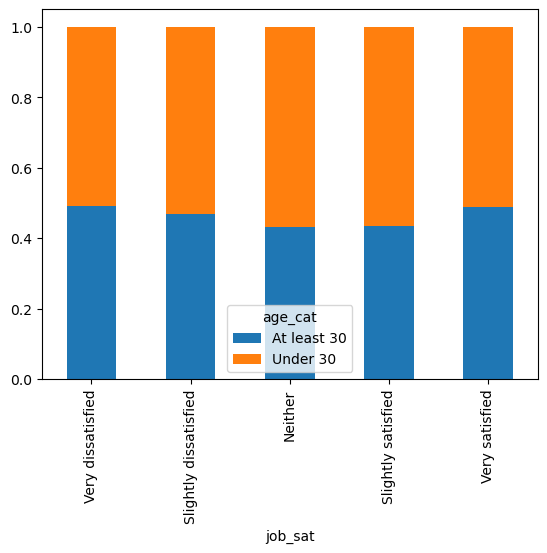

In [26]:
wide_props.plot(kind='bar', stacked=True)

For the figure above, if the age category was independent of job satisfaction, the split between the age categories will be at the same height in each of the five bars. However there are some variation here, but we'll need the chi-square independence test to determine whether it's a significance difference.

In [27]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='job_sat', y='age_cat')
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


since pval is above the significance level, we conclude that age categories are independent of job satisfaction

In chi-squadore, order does not matter, i.e. for two categorical variables X and Y, we can choose any to be the response variable and explanatory variable

## Chi-Square Goodness of Fit Tests

The Chi-square goodness of fit test is used to determine if the observed frequency distribution of a single categorical variable is significantly different from a theoretical or expected distribution. It tests how well the hypothesized data fits the observed data. To run the test, we use the __chisquare__ method from scipy.stats module. There are two required arguments to chisquare: an array-like object for the observed counts, __f_obs__ and one for the expected (hypothesized) counts, __f_exp__

In [39]:
purple_link_counts = stack_overflow['purple_link'].value_counts()

purple_link_counts = purple_link_counts.rename_axis('purple_link').reset_index(name='n').sort_values('purple_link')

purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


In [40]:
hypothesized = pd.DataFrame({
    'purple_link': ['Amuesed', 'Annoyed', 'Hello, old friend', 'Indifferent'],
    'prop': [1/6, 1/6, 1/2, 1/6]})

H<sub>0</sub>: The sample matches the hypothesized distribution

H<sub>1</sub>: The sample does not match the hypothesized distribution

The test statistci, $\chi^2$, measures how far the observed sample distribution of proportions is from the hypothesized distribution

In [41]:
alpha = 0.01

n_total = len(stack_overflow)
# Get the hypothesized count by category
hypothesized['n'] = hypothesized['prop'] * n_total
print(hypothesized)

         purple_link      prop            n
0            Amuesed  0.166667   376.833333
1            Annoyed  0.166667   376.833333
2  Hello, old friend  0.500000  1130.500000
3        Indifferent  0.166667   376.833333


In [43]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesized['n'])

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

The returned p-value is much less than the significance level, so we conclude that the sample distribution of proportions is different from the hypothesized distribution

# Assumptions in Hypothesis Testing

The hypothesis tests we have covered so far follows the following assumptions:

1. Each sample is randomly sourced from the population. if we don't have a random sample, then it will not be a representative of the population
2. Each observation in the dataset is independent. However, special cases exist, like the paired t-test where dependencies bewteen two samples are allowed.
3. The sample is large enough to mitigate uncertainty, so that the central limit theorem applies, and the sample distribution can be assumed to be normally distributed.

# Non-Parametic Tests

z-test, t-test, and ANOVA are all __parametic__ tests. They are all based on the assumption that the population is normally distributed and the sample dataset are large enough to allow central limit theorem. In situations where the assumptions are not met, we use __Non-parametric__ tests. They do not follow the normal distribution assumptions or sample size conditions. Many non-parametric tests use _ranks_ of the data. 

Consider the list, x: \
x = [1, 15, 3, 10, 6] \
The first value of x, 1, is the smallest value, and the second value, 15, is the fifth smallest value. These orderings from the smallest to the largest are known as the __ranks__ of the elements of x. We can access them using the __rankdata__ method from scipy.stats

We will explore __Wilcoxon signed rank test__, which was developed by Frank Wilcoxon in 1945. The test is equivalent to the paired t-test. This test requires us to:
1. calculate the absolute differences between pairs of data
2. Find the absolute value of the differences
3. Rank the absolute differences
4. Calculate a test statistic, W. W uses the signs of the difference column to split the ranks into two groups: one for negative differences and one for positive differences

Instead of following the mamual method above, we can calculate W and the p value __wilcoxon__ method from the pingouin package.

In [44]:
from scipy.stats import rankdata

x = [1, 15, 3, 10, 6]
rankdata(x)

array([1., 5., 2., 4., 3.])

In [46]:
repub_votes_small = repub_votes_potus_08_12.sample(n=5)
repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff
54,New Mexico,Sandoval,42.969470,45.095139,-2.125669
65,Oregon,Josephine,54.633880,58.832447,-4.198567
17,Illinois,Menard,56.806931,64.184685,-7.377755
82,Texas,Taylor,72.339215,76.055752,-3.716537
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134


In [47]:
# take the absolute value of the differences
repub_votes_small['abs_diff'] = repub_votes_small['diff'].abs()
print(repub_votes_small)

         state     county  repub_percent_08  repub_percent_12      diff  \
54  New Mexico   Sandoval         42.969470         45.095139 -2.125669   
65      Oregon  Josephine         54.633880         58.832447 -4.198567   
17    Illinois     Menard         56.806931         64.184685 -7.377755   
82       Texas     Taylor         72.339215         76.055752 -3.716537   
96   Wisconsin  La Crosse         37.490904         40.577038 -3.086134   

    abs_diff  
54  2.125669  
65  4.198567  
17  7.377755  
82  3.716537  
96  3.086134  


In [48]:
# rank the absolute differences
repub_votes_small['rank_abs_diff'] = rankdata(repub_votes_small['abs_diff'])
print(repub_votes_small)

         state     county  repub_percent_08  repub_percent_12      diff  \
54  New Mexico   Sandoval         42.969470         45.095139 -2.125669   
65      Oregon  Josephine         54.633880         58.832447 -4.198567   
17    Illinois     Menard         56.806931         64.184685 -7.377755   
82       Texas     Taylor         72.339215         76.055752 -3.716537   
96   Wisconsin  La Crosse         37.490904         40.577038 -3.086134   

    abs_diff  rank_abs_diff  
54  2.125669            1.0  
65  4.198567            4.0  
17  7.377755            5.0  
82  3.716537            3.0  
96  3.086134            2.0  


In [49]:
T_minus = 1 + 4 + 5 + 3 + 2 # sum of the ranks with negative differences
T_plus = 0 # sum of the ranks with positive diffeences

# find test statistic, W, which is the smaller between T_minus and T_plus
W = np.min([T_minus, T_plus])
W

0

In [50]:
# implementation with pingouin package
pingouin.wilcoxon(repub_votes_small['repub_percent_08'],
                  repub_votes_small['repub_percent_12'],
                  alternative='less')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,less,0.03125,-1.0,0.64


## More Parametric Tests

Here, we'll focus on non-parametric alternatives to tests of independent numeric samples. The __Wilcoxon-Mann-Whitney__ test is a t-test on ranked data. This test works on unpaired data

In [51]:
age_vs_comp = stack_overflow[['converted_comp', 'age_first_code_cut']]

# change to wide format
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', 
                                     values='converted_comp')
print(age_vs_comp_wide)

age_first_code_cut      adult     child
0                     77556.0       NaN
1                         NaN   74970.0
2                         NaN  594539.0
3                   2000000.0       NaN
4                     37816.0       NaN
...                       ...       ...
2256                      NaN  145000.0
2257                      NaN   33972.0
2258                      NaN   97284.0
2259                      NaN   72000.0
2260                      NaN  180000.0

[2261 rows x 2 columns]


In [52]:
alpha = 0.01

pingouin.mwu(x=age_vs_comp_wide['child'],
             y=age_vs_comp_wide['adult'],
             alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,0.222516,0.611258


Just as ANOVA extends t-test to more than two groups, the __Krsutal Wallis__ test extends Wilcoxon-Mann-Whitney test to more than two groups

In [53]:
alpha = 0.01

pingouin.kruskal(data=stack_overflow,
                 dv='converted_comp',
                 between='job_sat')

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15
